In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
path = 'Desktop\Machine Learning\machine-learning-ex1\ex1\ex1data1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


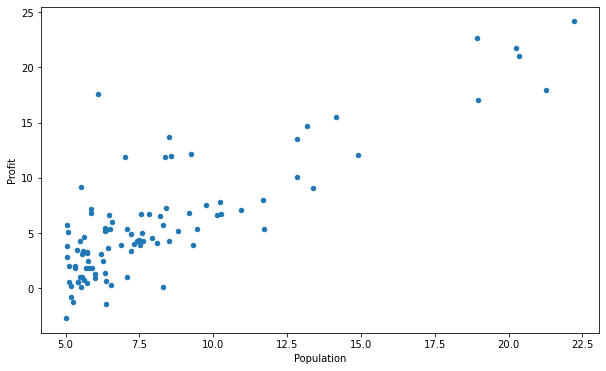

In [8]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(10,6))
plt.show()


In [5]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:,:-1]   #X是data里的除最后列
y = data.iloc[:,cols-1:cols]  #y是data最后一列
X.head()         


,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [25]:
X_matrix = np.matrix(X.values)
y_matrix = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))            #将DataFrame转换为np.matrix形式
m = len(X)
print(X.shape,theta.shape,y.shape)
Costfunc(X_matrix,y_matrix,theta)

(97, 2) (1, 2) (97, 1)


32.072733877455676

In [28]:
##Gradient descent finding optimal theta
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = Costfunc(X, y, theta)
        
    return theta, cost

In [31]:
alpha = 0.01
iters = 1500
g,cost = gradientDescent(X_matrix,y_matrix,theta,alpha,iters)
g

matrix([[-3.63029144,  1.16636235]])

In [35]:
predict = (1,5)*g.T
print('Prediction of y when x=5 is:',predict)

Prediction of y when x=5 is: [[2.20152031]]


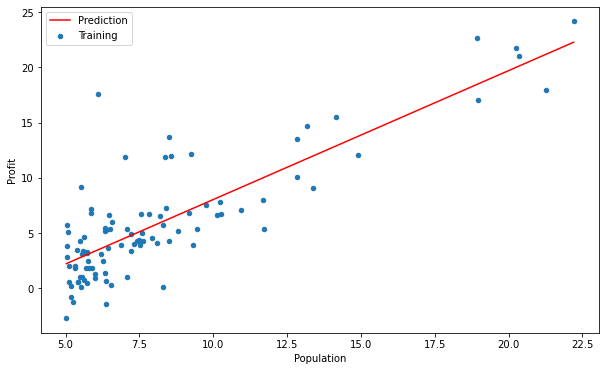

In [43]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0]+g[0,1]*x
data.plot(kind='scatter',x='Population',y='Profit',figsize=(10,6),label='Training')
plt.plot(x,f,'r',label='Prediction' )
plt.legend()

In [44]:
##多变量线性回归

path =  'Desktop\Machine Learning\machine-learning-ex1\ex1\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [46]:
data2 = (data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [47]:
data2.insert(0,'ones',1)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

X2_matrix = np.matrix(X2.values)
y2_matrix = np.matrix(y2.values)
theta2 = np.matrix(np.zeros(3))
g2, cost2 = gradientDescent(X2_matrix, y2_matrix, theta2, alpha, iters)
g2

matrix([[-5.52985553e-17,  8.84042349e-01, -5.24551809e-02]])

In [51]:
##正规方程      Do not need alpha but will not work if iterations is large.
def normalEqn(X,y):
    theta = np.linalg.inv(X.T*X)*X.T*y
    return theta
normal_theta1=normalEqn(X_matrix,y_matrix)
normal_theta1

matrix([[-3.89578088],
        [ 1.19303364]])